# Определение перспективного тарифа для телеком компании

Необходимо сделать предварительный анализ тарифов на небольшой выборке пользователей "Мегалайна" - 500 клиентов. 
В распоряжении есть 5 таблиц: информация о тарифах, информация о пользователях, данные по звонкам, по сообщениям и по использованию интернета.

Работа будет проходить по следующему плану:
- Шаг 1. Изучение общей информации о файлах: какая информация содержится в каждой из таблиц. 
- Шаг 2. Предобработка данных: приведение данных к нужным типам, удаление лишних данных, поверка на дубликаты.
- Шаг 3. Анализ данных: дополнительные расчеты, объединение таблиц, построение графиков.
- Шаг 4. Проверка гипотез.
- Шаг 5. Общий вывод.

## Изучение общей информации о файлах

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

Сначала посмотрим на таблицу с описанием тарифов.

In [2]:
tariffs = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице tariffs всего две строки с данными по тарифам. Ничего менять не нужно.

Описание тарифов
Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

Далее посмотрим на таблицу с пользователями.

In [3]:
users = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/users.csv')
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [4]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице users нужно проверить, что User ID уникальны. Также проверить названия городов на неявные дубликаты. Поменять тип данных в churn_date и reg_date на DateTime.

Откроем таблицу с данными о звонках.

In [6]:
calls = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/calls.csv')
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [7]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Для таблицы calls нужно произвести замену типа данных в столбце call_date на DateTime, проверить количество уникальных User ID, округлить время разговора до минут в большую сторону.

Откроем таблицу с информацией о сообщениях.

In [9]:
messages = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/messages.csv')
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [10]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице messages нужно произвести замену типа данных в столбце message_date на DateTime.

Откроем таблицу с информацией о расходовании интернет-трафика.

In [12]:
internet = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/internet.csv')
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [13]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице internet нужно округлить количество потраченных мегабайт в большую сторону, а также удалить лишний столбей, повторяющий автоматические индексы.

## Предобработка данных

Приведём столбцы с датами во всех трех таблицах в формат DateTime.

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Теперь округлим минуты и гигабайты до целых чисел в большую сторону.

In [16]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
calls['duration'] = calls['duration'].apply(np.ceil)

Удалим лишний столбец в таблице internet.

In [17]:
internet.drop('Unnamed: 0', axis=1, inplace=True)

В таблице users нужно проверить, что User ID уникальны. Также проверить названия городов на неявные дубликаты.

In [18]:
users['user_id'].nunique()

500

In [19]:
users['city'].nunique()

76

In [20]:
users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

76 городов можно проверить на дубликаты визуально. Дубликатов нет.

На всякий случай проверим, что в других таблицах содержатся все user id.

In [21]:
calls['user_id'].nunique()

492

In [22]:
messages['user_id'].nunique()

426

In [23]:
internet['user_id'].nunique()

497

Получается, 8 человек не совершали звонки (например, сим карта была куплена для интернета), 74 человека не посылали сообщения, 3 человека не пользовались интернетом. Значит, при объединении таблиц по user_id будет некоторое число строк с пропусками в соответствующих столбцах. Целесообразно будет заменить их на ноль.

Для дальнейшего анализа нам потребуется выделить в каждой таблице столбец с месяцами, в которых были совершены операции, чтобы можно было группировать данные по этому признаку.

In [24]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
display(calls.sample(3), messages.sample(3), internet.sample(3))

,id,call_date,duration,user_id,month
50037,1124_256,2018-11-13,9.0,1124,11
1771,1005_368,2018-02-15,4.0,1005,2
104063,1267_55,2018-08-05,0.0,1267,8


,id,message_date,user_id,month
41853,1178_76,2018-11-12,1178,11
72195,1303_147,2018-12-13,1303,12
32219,1144_358,2018-10-04,1144,10


,id,mb_used,session_date,user_id,month
147423,1492_373,271.0,2018-07-29,1492,7
22854,1076_494,7.0,2018-09-26,1076,9
20564,1068_314,0.0,2018-08-08,1068,8


Проверим, нет ли выбросов в продолжительности звонков и использовании интернете.

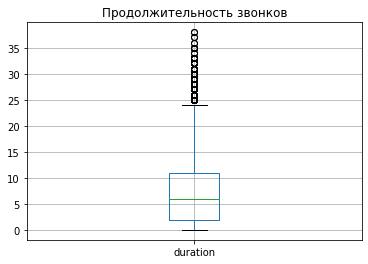

Text(0.5, 1.0, 'Использование интернета за одну сессию')

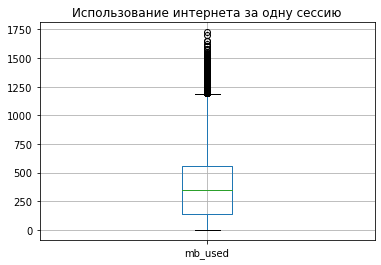

In [25]:
calls_dur = calls[['duration']]
calls_dur.boxplot().set_title('Продолжительность звонков')
plt.show()
mb_used_col = internet[['mb_used']]
mb_used_col.boxplot().set_title('Использование интернета за одну сессию')

Вывод:
Сильных выбросов нет. Данные проверены на дубликаты, изменены некоторые типы данных.
Данные достаточно чистые, чтобы можно было проводить дальнейший анализ.

## Анализ данных.

Необходимо посчитать для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя

Создадим таблицы, в которых сгруппируем данные по пользователям и по месяцам, что бы посчитать сумму минут разговора, сообщений и израсходованного трафика каждого пользователя в каждом из 12 месяцев.

In [26]:
calls_group = calls.groupby(['user_id', 'month'])['duration'].agg(['count','sum']).reset_index()
calls_group.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
messages_group = messages.groupby(['user_id', 'month'])['id'].agg(['count']).reset_index()
messages_group.columns = ['user_id', 'month', 'messages_count']
internet_group = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_group.columns = ['user_id', 'month', 'mb_used']
display(calls_group.head())
display(messages_group.tail())
display(internet_group.sample(5))

,user_id,month,calls_count,calls_sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


,user_id,month,messages_count
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59
2716,1499,12,66


,user_id,month,mb_used
1675,1264,12,16723.0
1159,1180,5,36666.0
2120,1335,12,12451.0
3144,1490,5,21362.0
281,1045,7,17247.0


Можно посмотреть, как менялось пользование услугами по месяцам. Но для этого нужно понять, как изменилось количество пользователей за год. Возьмем таблицу с продолжительностью и количеством звонков и сформируем еще одну группировку.

In [27]:
calls_group_1 = calls_group.groupby(['month'])['user_id'].agg(['count']).reset_index()
calls_group_1

,month,count
0,1,43
1,2,82
2,3,114
3,4,165
4,5,205
5,6,244
6,7,289
7,8,337
8,9,370
9,10,411


Text(0.5, 1.0, 'Количество звонков по месяцам')

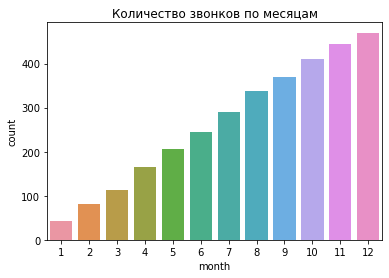

In [28]:
sns.barplot(x='month', y='count', data = calls_group_1).set_title('Количество звонков по месяцам')

Итак, количество пользователей сильно увеличилось к концу года, увеличение было постепенным и равномерным. А как изменилось использование услуг?
Сформируем группировку по продолжительности звонков: медиана, среднее, общая продлжительность. Построим графики.

In [29]:
calls_group_mean = calls.groupby(['month'])['duration'].agg(['median','mean', 'sum']).reset_index()
calls_group_mean

,month,median,mean,sum
0,1,7.0,7.306233,10784.0
1,2,7.0,7.348257,24455.0
2,3,7.0,7.200688,48151.0
3,4,6.0,7.151639,66310.0
4,5,6.0,7.022219,88810.0
5,6,6.0,7.147323,105180.0
6,7,7.0,7.200022,131746.0
7,8,6.0,7.152736,153698.0
8,9,7.0,7.209800,173475.0
9,10,7.0,7.143889,193928.0


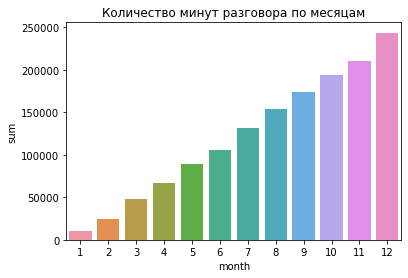

Text(0.5, 1.0, 'Средняя продолжительность звонков в месяц')

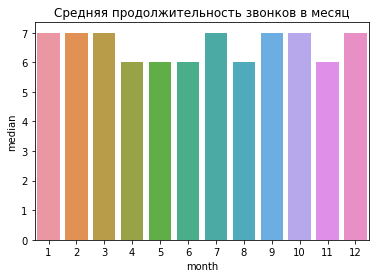

In [30]:
sns.barplot(x='month', y='sum', data = calls_group_mean).set_title('Количество минут разговора по месяцам')
plt.show()
sns.barplot(x='month', y='median', data = calls_group_mean).set_title('Средняя продолжительность звонков в месяц')

Как видно, количество минут увеличилось из-за увеличения количества пользователей. В среднем пользователи использовали одинаковое количество минут каждый месяц.
Возможно, с использованием интеренета будет другая картина?

In [31]:
internet_group_mean = internet.groupby(['month'])['mb_used'].agg(['median','mean', 'sum']).reset_index()
internet_group_mean

,month,median,mean,sum
0,1,347.0,365.454790,408213.0
1,2,338.0,362.115865,956348.0
2,3,351.0,371.332651,1813960.0
3,4,354.0,374.153125,2436111.0
4,5,352.0,375.201212,3529893.0
5,6,354.0,378.472461,4184770.0
6,7,349.0,371.663640,5035299.0
7,8,351.0,373.174621,6005126.0
8,9,348.0,368.600445,6454931.0
9,10,348.0,369.871258,7400754.0


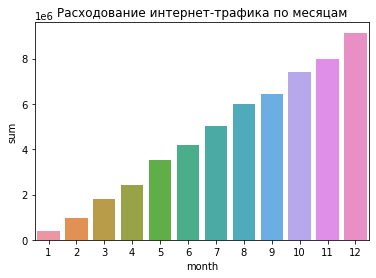

Text(0.5, 1.0, 'Средний расход интернет-трафика по месяцам')

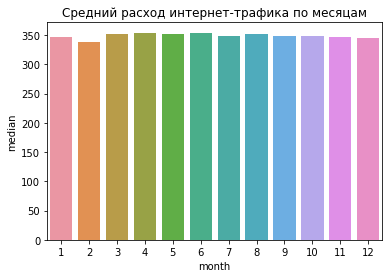

In [32]:
sns.barplot(x='month', y='sum', data = internet_group_mean).set_title('Расходование интернет-трафика по месяцам')
plt.show()
sns.barplot(x='month', y='median', data = internet_group_mean).set_title('Средний расход интернет-трафика по месяцам')

Получается, что и с использованием интренет-трафика такая же история, как и с количеством минут. В среднем пользователи каждый месяц тратили одинаковое количество трафика. Февраль - короткий месяц, поэтому значения чуть ниже.

Чтобы определить общую выручку по каждому клиенту, нужно объединить таблицы.

In [33]:
total_data = pd.merge(calls_group, messages_group, how='outer', on=['user_id', 'month']) # , on=['user_id', 'month']   inner
total_data

,user_id,month,calls_count,calls_sum,messages_count
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0
...,...,...,...,...,...
3208,1489,8,NaN,NaN,17.0
3209,1489,9,NaN,NaN,32.0
3210,1489,10,NaN,NaN,21.0
3211,1489,11,NaN,NaN,20.0


In [34]:
total_data = pd.merge(total_data, internet_group, how='outer', on=['user_id', 'month']) # , on=['user_id', 'month']
total_data

,user_id,month,calls_count,calls_sum,messages_count,mb_used
0,1000,5,22.0,159.0,22.0,2256.0
1,1000,6,43.0,172.0,60.0,23257.0
2,1000,7,47.0,340.0,75.0,14016.0
3,1000,8,52.0,408.0,81.0,14070.0
4,1000,9,58.0,466.0,57.0,14581.0
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17232.0
3210,1489,10,NaN,NaN,21.0,19588.0
3211,1489,11,NaN,NaN,20.0,17516.0
3212,1489,12,NaN,NaN,35.0,17341.0


In [35]:
all_users = users.loc[:,['user_id', 'city', 'tariff']] #выбираем нужные столбцы из таблицы users

In [36]:
total_data = pd.merge(total_data, all_users, how='outer', on=['user_id']) #соединяем со с данными из таблицы с пользователями
total_data

,user_id,month,calls_count,calls_sum,messages_count,mb_used,city,tariff
0,1000,5.0,22.0,159.0,22.0,2256.0,Краснодар,ultra
1,1000,6.0,43.0,172.0,60.0,23257.0,Краснодар,ultra
2,1000,7.0,47.0,340.0,75.0,14016.0,Краснодар,ultra
3,1000,8.0,52.0,408.0,81.0,14070.0,Краснодар,ultra
4,1000,9.0,58.0,466.0,57.0,14581.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,21.0,19588.0,Санкт-Петербург,smart
3212,1489,11.0,NaN,NaN,20.0,17516.0,Санкт-Петербург,smart
3213,1489,12.0,NaN,NaN,35.0,17341.0,Санкт-Петербург,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,Волжский,ultra


Посмотим на описание новой таблицы.

In [37]:
total_data.describe()

,user_id,month,calls_count,calls_sum,messages_count,mb_used
count,3216.000000,3214.000000,3174.000000,3174.000000,2717.000000,3203.000000
mean,1251.588930,8.317362,63.833333,456.931632,45.283769,17286.749610
std,144.645928,2.905413,32.678036,238.031270,35.051363,7523.580332
min,1000.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1125.000000,6.000000,41.000000,290.000000,19.000000,12543.000000
50%,1253.000000,9.000000,63.000000,447.000000,38.000000,16985.000000
75%,1378.250000,11.000000,83.000000,592.000000,63.000000,21455.500000
max,1499.000000,12.000000,244.000000,1673.000000,224.000000,49789.000000


In [38]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3216 non-null   int64  
 1   month           3214 non-null   float64
 2   calls_count     3174 non-null   float64
 3   calls_sum       3174 non-null   float64
 4   messages_count  2717 non-null   float64
 5   mb_used         3203 non-null   float64
 6   city            3216 non-null   object 
 7   tariff          3216 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 226.1+ KB


У двух пользователей пропуск в столбце с месяцем.

Посмотрим, когда эти абоненты подключились.

Оба пользователя подключились в декабре, то есть можно заменить пропуски на 12.

In [39]:
total_data['month'].fillna(12, inplace=True)

In [40]:
#проверяем, что пропуски заполнились
print(total_data.query('user_id == 1128'))
print(total_data.query('user_id == 1371'))

      user_id  month  calls_count  calls_sum  messages_count  mb_used  \
3214     1128   12.0          NaN        NaN             NaN      NaN   

          city tariff  
3214  Волжский  ultra  
      user_id  month  calls_count  calls_sum  messages_count  mb_used  city  \
3215     1371   12.0          NaN        NaN             NaN      NaN  Омск   

     tariff  
3215  smart  


По пропускам в столбцах с количеством звонков (и временем разговора), сообщений и интернет-трафика можно считать, что пустые значения - это отсуствие пользования этими услугами, то есть можно поставить 0.

In [41]:
total_data['calls_count'].fillna(0, inplace=True)
total_data['calls_sum'].fillna(0, inplace=True)
total_data['messages_count'].fillna(0, inplace=True)
total_data['mb_used'].fillna(0, inplace=True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3216 non-null   int64  
 1   month           3216 non-null   float64
 2   calls_count     3216 non-null   float64
 3   calls_sum       3216 non-null   float64
 4   messages_count  3216 non-null   float64
 5   mb_used         3216 non-null   float64
 6   city            3216 non-null   object 
 7   tariff          3216 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 226.1+ KB


Заменим тип данных в столбце month на int64

In [42]:
total_data['month'] = total_data['month'].astype(int)
total_data

,user_id,month,calls_count,calls_sum,messages_count,mb_used,city,tariff
0,1000,5,22.0,159.0,22.0,2256.0,Краснодар,ultra
1,1000,6,43.0,172.0,60.0,23257.0,Краснодар,ultra
2,1000,7,47.0,340.0,75.0,14016.0,Краснодар,ultra
3,1000,8,52.0,408.0,81.0,14070.0,Краснодар,ultra
4,1000,9,58.0,466.0,57.0,14581.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1489,10,0.0,0.0,21.0,19588.0,Санкт-Петербург,smart
3212,1489,11,0.0,0.0,20.0,17516.0,Санкт-Петербург,smart
3213,1489,12,0.0,0.0,35.0,17341.0,Санкт-Петербург,smart
3214,1128,12,0.0,0.0,0.0,0.0,Волжский,ultra


In [43]:
total_data.rename(columns={'tariff': 'tariff_name'}, inplace=True)
total_data

,user_id,month,calls_count,calls_sum,messages_count,mb_used,city,tariff_name
0,1000,5,22.0,159.0,22.0,2256.0,Краснодар,ultra
1,1000,6,43.0,172.0,60.0,23257.0,Краснодар,ultra
2,1000,7,47.0,340.0,75.0,14016.0,Краснодар,ultra
3,1000,8,52.0,408.0,81.0,14070.0,Краснодар,ultra
4,1000,9,58.0,466.0,57.0,14581.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1489,10,0.0,0.0,21.0,19588.0,Санкт-Петербург,smart
3212,1489,11,0.0,0.0,20.0,17516.0,Санкт-Петербург,smart
3213,1489,12,0.0,0.0,35.0,17341.0,Санкт-Петербург,smart
3214,1128,12,0.0,0.0,0.0,0.0,Волжский,ultra


Чтобы определить выручку по каждому клиенту, нужно вычесть входящие в абонентскую плату минуты разговора, сообщения и интернет-трафик, а оставшиеся количества умножить на стоимость согласно тарифу. 
У нас есть два тарифа: smart и ultra. Добавим данные по тарифам в таблицу.

In [44]:
total_data_tariff = pd.merge(total_data, tariffs, how='outer', on=['tariff_name'])
total_data_tariff

,user_id,month,calls_count,calls_sum,messages_count,mb_used,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,2256.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14016.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14070.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,14581.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9,0.0,0.0,32.0,17232.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3212,1489,10,0.0,0.0,21.0,19588.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3213,1489,11,0.0,0.0,20.0,17516.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3214,1489,12,0.0,0.0,35.0,17341.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3


Напишем функцию, которая поможет посчитать, сколько всего потратил каждый абонент в каждом месяце.

In [45]:
def total(row):
    total_cost = row.rub_monthly_fee #абонентская плата по тарифу
    if row['messages_count'] > row['messages_included']:
        total_cost += (row['messages_count'] - row['messages_included'])*row['rub_per_message'] #оплата за доп.сообщения
       
    if row['calls_sum'] > row['minutes_included']:
        total_cost += (row['calls_sum'] - row['minutes_included'])*row['rub_per_minute'] #оплата за доп.минуты
       
    if row['mb_used'] > row['mb_per_month_included']:
        total_cost += ((row['mb_used'] - row['mb_per_month_included'])/1024)*row['rub_per_gb'] #оплата за доп.гб
      
    return round(total_cost, 2)
        

In [46]:
total_data_tariff['total_cost'] = total_data_tariff.apply(total, axis=1)
total_data_tariff.tail(10)

,user_id,month,calls_count,calls_sum,messages_count,mb_used,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_cost
3206,1499,9,9.0,70.0,11.0,1848.0,Пермь,smart,50,15360,500,550,200,3,3,550.00
3207,1499,10,68.0,449.0,48.0,17809.0,Пермь,smart,50,15360,500,550,200,3,3,1028.32
3208,1499,11,74.0,612.0,59.0,17984.0,Пермь,smart,50,15360,500,550,200,3,3,1425.50
3209,1499,12,69.0,492.0,66.0,13077.0,Пермь,smart,50,15360,500,550,200,3,3,598.00
3210,1489,8,0.0,0.0,17.0,11066.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,550.00
3211,1489,9,0.0,0.0,32.0,17232.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,915.62
3212,1489,10,0.0,0.0,21.0,19588.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,1375.78
3213,1489,11,0.0,0.0,20.0,17516.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,971.09
3214,1489,12,0.0,0.0,35.0,17341.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,936.91
3215,1371,12,0.0,0.0,0.0,0.0,Омск,smart,50,15360,500,550,200,3,3,550.00


In [47]:
total_data_tariff['user_id'].nunique() #проверим, что все пользователи на месте.

500

Определим поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [48]:
total_per_month = total_data_tariff.groupby(['tariff_name', 'month'])['calls_sum', 'messages_count', 'mb_used', 'total_cost'].sum().reset_index()
total_per_month['mb_used'] = total_per_month['mb_used'] / 1000
total_per_month.rename(columns={'mb_used': 'gb_used'}, inplace=True)
total_per_month

C:\Users\Anna\AppData\Local\Temp\ipykernel_9212\4191105047.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_per_month = total_data_tariff.groupby(['tariff_name', 'month'])['calls_sum', 'messages_count', 'mb_used', 'total_cost'].sum().reset_index()


,tariff_name,month,calls_sum,messages_count,gb_used,total_cost
0,smart,1,6931.0,620.0,289.831,23886.90
1,smart,2,17324.0,1397.0,673.461,46651.59
2,smart,3,30034.0,2453.0,1164.537,86115.43
3,smart,4,41119.0,3443.0,1509.702,103302.14
4,smart,5,54618.0,4762.0,2231.353,161716.01
5,smart,6,64885.0,5478.0,2593.622,188531.07
6,smart,7,82079.0,6784.0,3168.466,234780.75
7,smart,8,99045.0,7905.0,3908.561,295746.98
8,smart,9,111439.0,8746.0,4244.377,311758.86
9,smart,10,125284.0,9927.0,4932.898,383623.65


Разделим таблицу на две таблицы по тарифам, чтобы построить графики по ним и сравнить параметры.

In [49]:
smart_total = total_per_month.query('tariff_name=="smart"').reset_index(drop=True)
ultra_total = total_per_month.query('tariff_name=="ultra"').reset_index(drop=True)
display(smart_total)
ultra_total

,tariff_name,month,calls_sum,messages_count,gb_used,total_cost
0,smart,1,6931.0,620.0,289.831,23886.90
1,smart,2,17324.0,1397.0,673.461,46651.59
2,smart,3,30034.0,2453.0,1164.537,86115.43
3,smart,4,41119.0,3443.0,1509.702,103302.14
4,smart,5,54618.0,4762.0,2231.353,161716.01
5,smart,6,64885.0,5478.0,2593.622,188531.07
6,smart,7,82079.0,6784.0,3168.466,234780.75
7,smart,8,99045.0,7905.0,3908.561,295746.98
8,smart,9,111439.0,8746.0,4244.377,311758.86
9,smart,10,125284.0,9927.0,4932.898,383623.65


,tariff_name,month,calls_sum,messages_count,gb_used,total_cost
0,ultra,1,3853.0,304.0,118.382,17550.00
1,ultra,2,7131.0,527.0,282.887,47353.13
2,ultra,3,18117.0,1195.0,649.423,74154.35
3,ultra,4,25191.0,1736.0,926.409,109748.74
4,ultra,5,34192.0,2536.0,1298.540,137682.72
5,ultra,6,40295.0,3505.0,1591.148,170693.10
6,ultra,7,49667.0,4536.0,1866.833,191873.73
7,ultra,8,54653.0,5183.0,2096.565,221613.29
8,ultra,9,62036.0,6013.0,2210.554,231578.48
9,ultra,10,68644.0,7187.0,2467.856,253000.91


Построим графики.

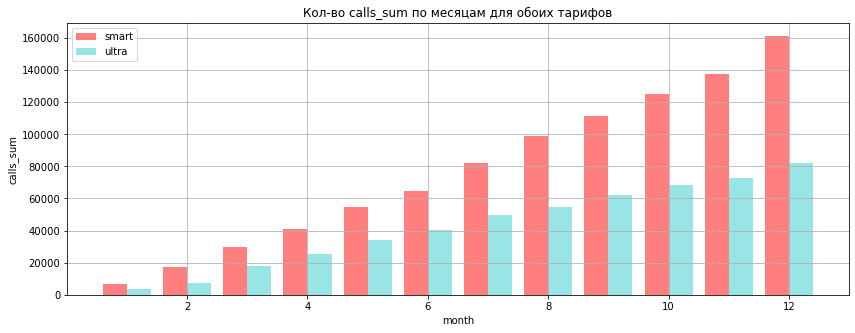

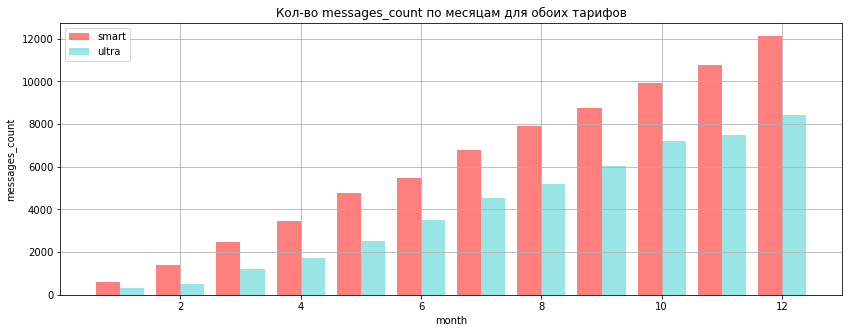

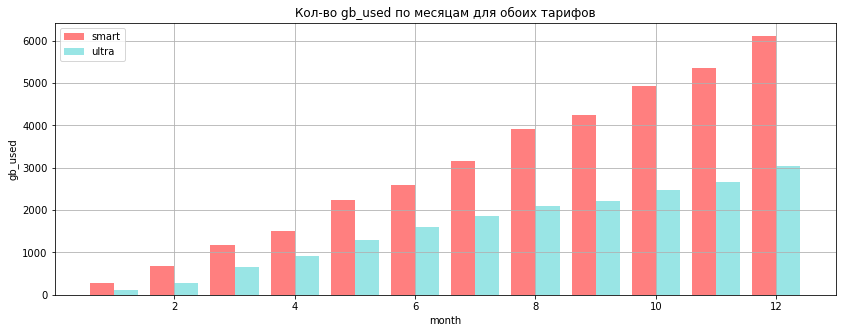

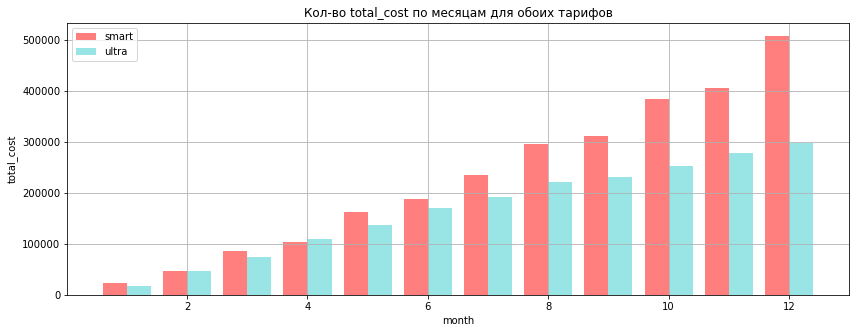

In [50]:
for index in ['calls_sum', 'messages_count', 'gb_used','total_cost']:
    w = 0.4
    plt.figure(figsize=(14, 5))
    plt.bar(smart_total['month']-w/2, smart_total[index], label='smart', color='r', alpha=0.5, width=w)
    plt.bar(ultra_total['month']+w/2, ultra_total[index], label='ultra', color='c', alpha=0.4, width=w)


    plt.xlabel('month')
    plt.ylabel(index)
    plt.grid()
    plt.title(f'Кол-во {index} по месяцам для обоих тарифов')
    plt.legend()
    plt.show()

In [51]:
#посмотрим описание таблиц
display(smart_total.describe())
ultra_total.describe()

,month,calls_sum,messages_count,gb_used,total_cost
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,77631.416667,6201.083333,3014.571750,229140.486667
std,3.605551,49912.744923,3790.989687,1917.105774,154323.725931
min,1.000000,6931.000000,620.000000,289.831000,23886.900000
25%,3.750000,38347.750000,3195.500000,1423.410750,99005.462500
50%,6.500000,73482.000000,6131.000000,2881.044000,211655.910000
75%,9.250000,114900.250000,9041.250000,4416.507250,329725.057500
max,12.000000,161275.000000,12130.000000,6112.113000,508029.830000


,month,calls_sum,messages_count,gb_used,total_cost
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,43227.000000,4051.916667,1599.549833,169297.670833
std,3.605551,26050.944558,2838.549036,952.679969,92471.636460
min,1.000000,3853.000000,304.000000,118.382000,17550.000000
25%,3.750000,23422.500000,1600.750000,857.162500,100850.142500
50%,6.500000,44981.000000,4020.500000,1728.990500,181283.415000
75%,9.250000,63688.000000,6306.500000,2274.879500,236934.087500
max,12.000000,82400.000000,8425.000000,3032.089000,297498.210000


На графиках видно, что пользователи более дешевого тарифа smart используют больше минут, сообщений и трифика, чем пользователи тарифа ultra. Но это связано с тем, что первым тарифом пользуется больше абонентов.

In [52]:
total_use = total_data_tariff.pivot_table(index=['tariff_name'], aggfunc={'calls_sum': sum, 'messages_count': sum, 'mb_used': sum, 'total_cost': sum, 'user_id': 'count'})
total_use

,calls_sum,mb_used,messages_count,total_cost,user_id
tariff_name,,,,,
smart,931577.0,36174861.0,74413.0,2749685.84,2230
ultra,518724.0,19194598.0,48623.0,2031572.05,986


Действительно, абонентов тарифа ultra гораздо меньше, поэтому в целом ими используется меньше ресурсов, а также они приносят меньше дохода в сумме.
Вернемся к общей таблице total_data_tariff

In [53]:
total_data_tariff.head(10)

,user_id,month,calls_count,calls_sum,messages_count,mb_used,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_cost
0,1000,5,22.0,159.0,22.0,2256.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,43.0,172.0,60.0,23257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,47.0,340.0,75.0,14016.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,52.0,408.0,81.0,14070.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,58.0,466.0,57.0,14581.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,10,57.0,350.0,73.0,14717.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,11,43.0,338.0,58.0,14768.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,12,46.0,333.0,70.0,9827.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1003,8,55.0,380.0,37.0,8571.0,Москва,ultra,1000,30720,3000,1950,150,1,1,1950.0
9,1003,9,134.0,961.0,91.0,12479.0,Москва,ultra,1000,30720,3000,1950,150,1,1,1950.0


Выделим нужные нам столбцы.

In [54]:
total_data_cut = total_data_tariff[['user_id', 'month', 'calls_sum', 'messages_count', 'mb_used', 'total_cost', 'tariff_name']]
total_data_cut

,user_id,month,calls_sum,messages_count,mb_used,total_cost,tariff_name
0,1000,5,159.0,22.0,2256.0,1950.00,ultra
1,1000,6,172.0,60.0,23257.0,1950.00,ultra
2,1000,7,340.0,75.0,14016.0,1950.00,ultra
3,1000,8,408.0,81.0,14070.0,1950.00,ultra
4,1000,9,466.0,57.0,14581.0,1950.00,ultra
...,...,...,...,...,...,...,...
3211,1489,9,0.0,32.0,17232.0,915.62,smart
3212,1489,10,0.0,21.0,19588.0,1375.78,smart
3213,1489,11,0.0,20.0,17516.0,971.09,smart
3214,1489,12,0.0,35.0,17341.0,936.91,smart


Здесь также сделаем две таблицы, чтобы можно было сравнить распределение значений на графике.

In [55]:
smart_abonents = total_data_cut.query('tariff_name=="smart"').reset_index(drop=True)
ultra_abonents = total_data_cut.query('tariff_name=="ultra"').reset_index(drop=True)
display(smart_abonents)
ultra_abonents

,user_id,month,calls_sum,messages_count,mb_used,total_cost,tariff_name
0,1001,11,430.0,0.0,18452.0,1153.91,smart
1,1001,12,414.0,0.0,14053.0,550.00,smart
2,1002,6,117.0,4.0,10871.0,550.00,smart
3,1002,7,214.0,11.0,17601.0,987.70,smart
4,1002,8,289.0,13.0,20347.0,1524.02,smart
...,...,...,...,...,...,...,...
2225,1489,9,0.0,32.0,17232.0,915.62,smart
2226,1489,10,0.0,21.0,19588.0,1375.78,smart
2227,1489,11,0.0,20.0,17516.0,971.09,smart
2228,1489,12,0.0,35.0,17341.0,936.91,smart


,user_id,month,calls_sum,messages_count,mb_used,total_cost,tariff_name
0,1000,5,159.0,22.0,2256.0,1950.0,ultra
1,1000,6,172.0,60.0,23257.0,1950.0,ultra
2,1000,7,340.0,75.0,14016.0,1950.0,ultra
3,1000,8,408.0,81.0,14070.0,1950.0,ultra
4,1000,9,466.0,57.0,14581.0,1950.0,ultra
...,...,...,...,...,...,...,...
981,1473,9,0.0,19.0,17307.0,1950.0,ultra
982,1473,10,0.0,20.0,13703.0,1950.0,ultra
983,1473,11,0.0,14.0,21692.0,1950.0,ultra
984,1473,12,0.0,20.0,18432.0,1950.0,ultra


Построим гистограммы.

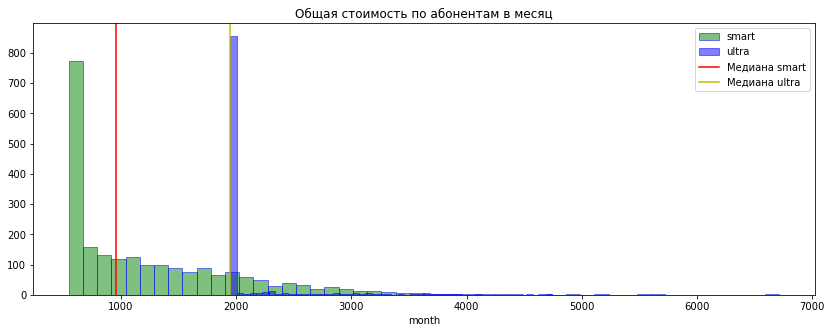

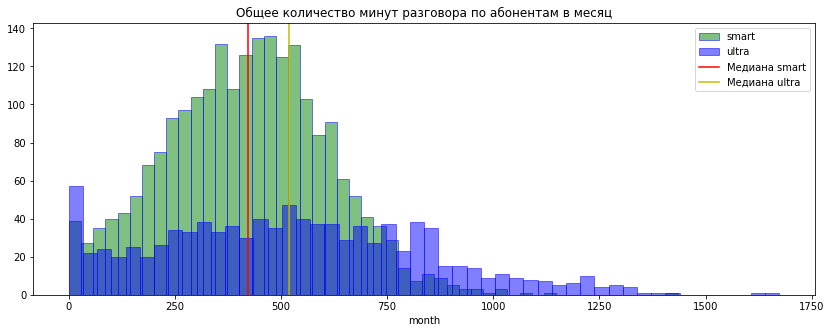

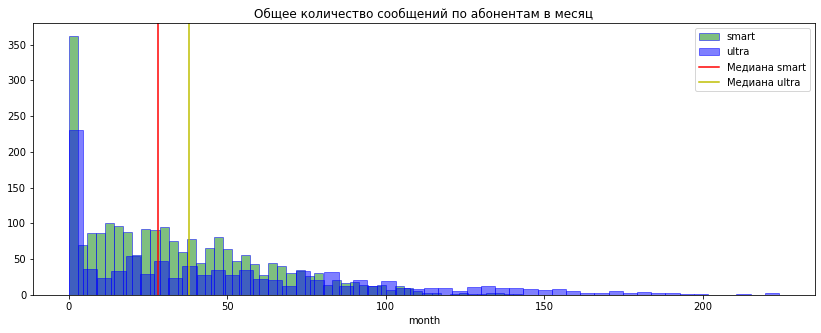

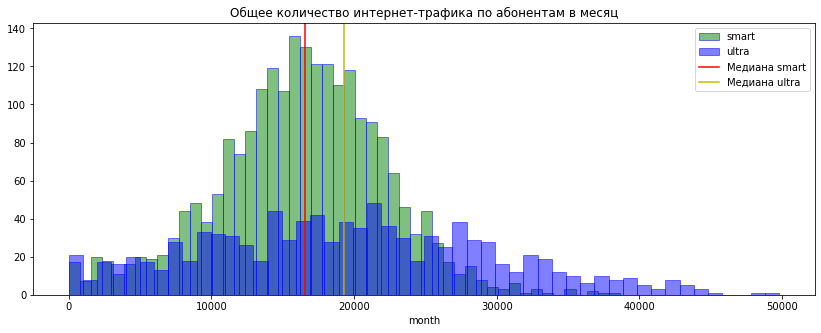

In [56]:
plt.figure(figsize=(14,5))
plt.hist(smart_abonents['total_cost'], bins=50, label='smart', color='g', edgecolor='b', alpha=0.5, density=False)
plt.hist(ultra_abonents['total_cost'], bins=50, label='ultra', color='b', edgecolor='b', alpha=0.5, density=False)
plt.title('Общая стоимость по абонентам в месяц')
plt.axvline(smart_abonents['total_cost'].describe()['50%'], color='r', label="Медиана smart")
plt.axvline(ultra_abonents['total_cost'].describe()['50%'], color='y', label="Медиана ultra")
plt.legend()
plt.xlabel('month')
plt.show()

plt.figure(figsize=(14,5))
plt.hist(smart_abonents['calls_sum'], bins=50, label='smart', color='g', edgecolor='b', alpha=0.5, density=False)
plt.hist(ultra_abonents['calls_sum'], bins=50, label='ultra', color='b', edgecolor='b', alpha=0.5, density=False)
plt.title('Общее количество минут разговора по абонентам в месяц')
plt.axvline(smart_abonents['calls_sum'].describe()['50%'], color='r', label="Медиана smart")
plt.axvline(ultra_abonents['calls_sum'].describe()['50%'], color='y', label="Медиана ultra")
plt.legend()
plt.xlabel('month')
plt.show()

plt.figure(figsize=(14,5))
plt.hist(smart_abonents['messages_count'], bins=50, label='smart', color='g', edgecolor='b', alpha=0.5, density=False)
plt.hist(ultra_abonents['messages_count'], bins=50, label='ultra', color='b', edgecolor='b', alpha=0.5, density=False)
plt.title('Общее количество сообщений по абонентам в месяц')
plt.axvline(smart_abonents['messages_count'].describe()['50%'], color='r', label="Медиана smart")
plt.axvline(ultra_abonents['messages_count'].describe()['50%'], color='y', label="Медиана ultra")
plt.legend()
plt.xlabel('month')
plt.show()

plt.figure(figsize=(14,5))
plt.hist(smart_abonents['mb_used'], bins=50, label='smart', color='g', edgecolor='b', alpha=0.5, density=False)
plt.hist(ultra_abonents['mb_used'], bins=50, label='ultra', color='b', edgecolor='b', alpha=0.5, density=False)
plt.title('Общее количество интернет-трафика по абонентам в месяц')
plt.axvline(smart_abonents['mb_used'].describe()['50%'], color='r', label="Медиана smart")
plt.axvline(ultra_abonents['mb_used'].describe()['50%'], color='y', label="Медиана ultra")
plt.legend()
plt.xlabel('month')
plt.show()

Посмотрим статистические данные по абонентам smart

In [57]:
(total_data_cut.query('tariff_name == "smart"')).describe()

,user_id,month,calls_sum,messages_count,mb_used,total_cost
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,1246.562332,8.348430,417.747534,33.369058,16221.910762,1233.042978
std,146.110501,2.920685,190.476754,28.230396,5886.299627,787.644351
min,1001.000000,1.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,282.000000,10.000000,12645.250000,550.000000
50%,1240.000000,9.000000,421.500000,28.000000,16529.000000,959.550000
75%,1376.000000,11.000000,545.000000,51.000000,20068.000000,1667.590000
max,1499.000000,12.000000,1435.000000,143.000000,38610.000000,6711.020000


Сравним статистические вычисления попарно.

In [58]:
for index in ['calls_sum', 'messages_count', 'mb_used','total_cost']:
    print(' ')
    print('Дисперсия smart', index, '--', round(np.var(smart_abonents[index], ddof=1))) 
    print('Дисперсия ultra', index,'--', round(np.var(ultra_abonents[index], ddof=1)))
    print(' ')
    print('Среднее ultra', index, '--', round((ultra_abonents[index]).mean()))
    print('Среднее smart', index, '--', round((smart_abonents[index]).mean()))
    print(' ')
    print('Стандартное отклонение ultra', index, '--', round(np.std(ultra_abonents[index], ddof=1)))
    print('Стандартное отклонение smart', index, '--', round(np.std(smart_abonents[index], ddof=1)))

 
Дисперсия smart calls_sum -- 36281
Дисперсия ultra calls_sum -- 101052
 
Среднее ultra calls_sum -- 526
Среднее smart calls_sum -- 418
 
Стандартное отклонение ultra calls_sum -- 318
Стандартное отклонение smart calls_sum -- 190
 
Дисперсия smart messages_count -- 797
Дисперсия ultra messages_count -- 2285
 
Среднее ultra messages_count -- 49
Среднее smart messages_count -- 33
 
Стандартное отклонение ultra messages_count -- 48
Стандартное отклонение smart messages_count -- 28
 
Дисперсия smart mb_used -- 34648523
Дисперсия ultra mb_used -- 102217264
 
Среднее ultra mb_used -- 19467
Среднее smart mb_used -- 16222
 
Стандартное отклонение ultra mb_used -- 10110
Стандартное отклонение smart mb_used -- 5886
 
Дисперсия smart total_cost -- 620384
Дисперсия ultra total_cost -- 126837
 
Среднее ultra total_cost -- 2060
Среднее smart total_cost -- 1233
 
Стандартное отклонение ultra total_cost -- 356
Стандартное отклонение smart total_cost -- 788


Выводы:
 - На гистограмме по общей стоимости мы видим большой всплеск как у абонентов тарифа smart, так и ultra - это 550р. и 1950р. соответственно - абонентская плата за тариф. 
 - Если рассматривать общую стоимость услуг, то среднее и медиана у тарифа ultra близки, стандартное отклонение небольшое. Более 75% пользователей платят только абонентскую плату. А вот в тарифе smart средее значение уже сильнее отличается от медианы. Значит, большое количество пользователей отклоняется от среднего в сторону увеличения стоимости услуг.
 - Абонентам ultra хватает включенных минут, они даже не используют их. Максимальное значение - 1673 при включенных 3000 мин. Абоненты smart часто используют все входящие в тариф минуты разговора, а иногда и превышают их.
 - Что касается сообщений, то многие абоненты обоих тарифов не пользуются ими: мы видим всплески на нулевом значении. Это вполне понятно, учитывая активное использование мессенджеров для обмена сообщениями. Но всё же есть абоненты, которые рассылают смс, даже превышая входящие в тарифы лимиты. Возможно, абоненты используют номер для рассылки (например, напоминания о записи на приём).
 - Пользователям тарифа smart интернет-трафика хватает впритык - у них 15 гб в месяц. А абоненты smart чаще укладываются в положенные им 30гб.

## Проверка гипотез

Гипотеза №1
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Сначала проверим, нет ли в колонке с общей выручкой выбросов.

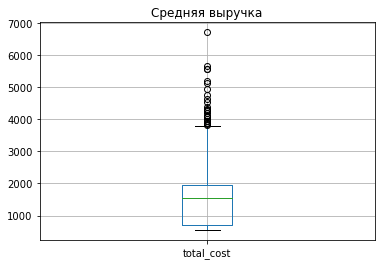

In [59]:
total_cost_plt = total_data_tariff[['total_cost']]
total_cost_plt.boxplot().set_title('Средняя выручка')
plt.show()

Наблюдаем выбросы в столбце с выручкой. Уберем значения, которые больше, чем полтора квартиля.

In [60]:
q1 = total_data_tariff['total_cost'].quantile(0.25)
q3 = total_data_tariff['total_cost'].quantile(0.75)
ind = q3 - q1
total_data_tariff = total_data_tariff.loc[(total_data_tariff['total_cost'] <= (q3 + ind*1.5))]

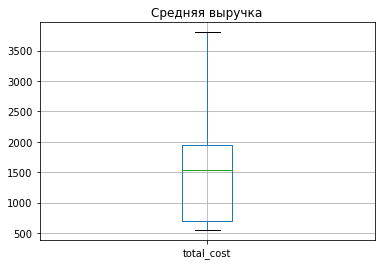

In [61]:
total_cost_plt = total_data_tariff[['total_cost']]
total_cost_plt.boxplot().set_title('Средняя выручка')
plt.show()

Теперь выбросов нет, можно приступать к проверке гипотез.

Сформулируем гипотезы:

H0 - средняя выручка пользователей тарифов ultra и smart равны.
H1 - средняя выручка пользователей тарифов ultra и smart различаются.

In [62]:
smart_ttest = total_data_tariff[total_data_tariff['tariff_name']=='smart']['total_cost']
ultra_ttest = total_data_tariff[total_data_tariff['tariff_name']=='ultra']['total_cost']


alpha = 0.05

results = st.ttest_ind(smart_ttest, ultra_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


На основе ttest приходим к выводу, что средняя выручка по тарифам сильно отличается, поэтому нулевая гипотеза отвергается.

Гипотеза №2 
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;
Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Средняя выручка в зависимости от региона может отличаться как в большую, так и в меньшую сторону - альтернативная гипотеза двусторонняя.

In [63]:
moscow_ttest = total_data_tariff[total_data_tariff['city']=='Москва']['total_cost']

other_ttest = total_data_tariff[total_data_tariff['city']!='Москва']['total_cost'].mean()


alpha = 0.05

results = st.ttest_1samp(moscow_ttest, other_ttest)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.21258780901679808
Не получилось отвергнуть нулевую гипотезу


Мы получили довольно большой уровень статистической значимости. Значит, нет особых различий между выручкой в Москве и других регионов. Нулевую гипотезу не отвергаем.

## Общий вывод

Проведенное исследование помогло сделать следующие выводы:

- Количество абонентов значительно выросло за год, поэтому наблюдается и рост общей выручки.
Пользование услвгами у среднего пользователя не особенно изменилось за год.
 
- Тариф Smart дешевле, поэтому им бользуется большее количество абонентов. За счет этого в целом пользователи этого тарифа приносят больше выручки, чем пользователи тарифа Ultra. 
  
- Пользователи тарифа Ultra гораздо реже превышают лимиты по улугам, чем пользователи Smart.  Более 75% пользователей платят только абонентскую плату. А вот в тарифе smart большое количество пользователей отклоняется от среднего в сторону увеличения стоимости услуг, то есть они чаще превышают входящие в тариф лимиты.
 
- Абонентам ultra хватает включенных минут, большинство даже не использует все минуты. Максимальное значение - 1673 при включенных 3000 мин. Абоненты smart часто используют все входящие в тариф минуты разговора, а иногда и превышают их.
 
- Что касается сообщений, то многие абоненты обоих тарифов не пользуются ими: мы видим всплески на нулевом значении. Это вполне понятно, учитывая активное использование мессенджеров для обмена сообщениями. Но всё же есть абоненты, которые рассылают смс, даже превышая входящие в тарифы лимиты. Возможно, абоненты используют номер для рассылки (например, напоминания о записи на приём).
 
- Пользователям тарифа smart интернет-трафика хватает впритык - у них 15 гб в месяц. А абоненты smart чаще укладываются в положенные им 30гб.

- Средняя выручка по тарифам отличается, а вот зависимости от города, в котором располагается абонент, не наблюдается. Жители всех городов тратят примерно одинаковую сумму в месяц.
 
Для среднего абонента лчше порекомендовать тариф Smart, ведь даже при условии активного пользования услугами и разумного превышения лимитов он, скорее всего, заплатит меньше, чем абонентская плата по тарифу Ultra.